# Hydrologiska Byråns Vattenbalansavdelning (HBV) Model
This is an example run of the Python implimentation of the HBV model.
## HBV
This is the code for the Basic Model Interface (BMI) that is used to call the cfe and interact with other models via the Framework, or driving code. This code contains all the required BMI functions to run the HBV, including 
 - initialize: Perform startup tasks for the model.
 - update: Advance model state by one time step. Calls the function `run_hbv` from `hbv.py`
 - finalize: Perform tear-down tasks for the model.
 - get_value: Get a copy of values of a given variable.
 - set_value: Set the values of a given variable.
 - etc.  
 These functions need to be called by a framework or driving code, an example of which is below.

In [1]:
import time
import numpy as np
import pandas as pd
import json
import math
import matplotlib.pyplot as plt
import bmi_hbv
from dataretrieval import nwis
from IPython.display import display

### Create an instance of the model with a specific configuration that corresponds to a particular catchmenmt.

In [2]:
hbv_instance = bmi_hbv.BMI_HBV()

In [3]:
hbv_instance.get_input_var_names()

['atmosphere_water__precipitation_mass_flux',
 'atmosphere_air__temperature',
 'earth_day']

### This initialization function should perform all tasks that are to take place before entering the model’s time loop. Models should be refactored, if necessary, to read their inputs (which could include filenames for other input files) from a configuration file. BMI does not impose any constraint on how configuration files are formatted.

In [4]:
hbv_instance.initialize(cfg_file='config_LoganRiver_GA.json')

In [5]:
with open(hbv_instance.forcing_file, 'r') as f:
    df_forcing = pd.read_csv(f)
    count = len(df_forcing)
count

14610

### We will want to visualize the model output

In [6]:
outputs=hbv_instance.get_output_var_names()
output_lists = {output:[] for output in outputs}

In [7]:
with open(hbv_instance.forcing_file, 'r') as f:
    df_forcing = pd.read_csv(f)
    count = len(df_forcing)

date = []
for i in range(1,count):

    hbv_instance.update()


    date.append(hbv_instance.current_time)
    
    for output in outputs:
    
        output_lists[output].append(hbv_instance.get_value(output))



In [8]:
data = pd.DataFrame({
                     'date': date,
                     'Potential Evaporation': output_lists['land_surface_water__potential_evaporation_volume_flux'],
                     'Snow Water Equivalent': output_lists['Snowpack__liquid_equivalent_state_Variable'],
                     'Snow fall': output_lists['snow_fall'],
                     'Water Input to catchment': output_lists['catchment_water_input'],
                     'Actual Evaporation': output_lists['Actual_evaporation'],
                     'Soil Storage': output_lists['Soil_Storage'],
                     'Unrouted Shallow streamflow': output_lists['shallow_flow'],
                     'Unrouted Upper Zone streamflow': output_lists['flow_from_upper_storage'],
                     'Unrouted lower Zone streamflow': output_lists['flow_from_lower_storage'],
                     'Total Unrouted streamflow': output_lists['unrouted_streamflow_through_channel_network'],
                     'Upper GW reservoir water storage': output_lists['storage_from_upper_GW_reservoir'],
                     'Lower GW reservoir water storage': output_lists['storage_from_lower_GW_reservoir'],
                     'Total Soil Storage': output_lists['total_storage']
                    })
data

,date,Potential Evaporation,Snow Water Equivalent,Snow fall,Water Input to catchment,Actual Evaporation,Soil Storage,Unrouted Shallow streamflow,Unrouted Upper Zone streamflow,Unrouted lower Zone streamflow,Total Unrouted streamflow,Upper GW reservoir water storage,Lower GW reservoir water storage,Total Soil Storage
0,1981-01-02,0.708395,152.400000,0.000000,0.0,0.0,497.370487,0.0,0.0,0.000000,0.000000,0.0,0.000000,497.370487
1,1981-01-03,0.620757,152.400000,0.000000,0.0,0.0,497.370487,0.0,0.0,0.000000,0.000000,0.0,0.000000,497.370487
2,1981-01-04,0.559048,152.400000,0.000000,0.0,0.0,497.370487,0.0,0.0,0.000000,0.000000,0.0,0.000000,497.370487
3,1981-01-05,0.567115,152.491347,0.091347,0.0,0.0,497.370487,0.0,0.0,0.000000,0.000000,0.0,0.000000,497.370487
4,1981-01-06,0.500972,154.521523,2.030177,0.0,0.0,497.370487,0.0,0.0,0.000000,0.000000,0.0,0.000000,497.370487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14604,2020-12-27,0.462149,54.723730,0.144227,0.0,0.0,166.667971,0.0,0.0,0.116748,0.116748,0.0,3.657883,170.325853
14605,2020-12-28,0.494859,60.346269,5.622539,0.0,0.0,166.667971,0.0,0.0,0.113137,0.113137,0.0,3.544746,170.212716
14606,2020-12-29,0.356121,60.490496,0.144227,0.0,0.0,166.667971,0.0,0.0,0.109638,0.109638,0.0,3.435108,170.103078
14607,2020-12-30,0.297415,60.490496,0.000000,0.0,0.0,166.667971,0.0,0.0,0.106247,0.106247,0.0,3.328861,169.996831


In [9]:
sum(data['Total Unrouted streamflow'])
streamflow = data[['date', 'Total Unrouted streamflow']]
streamflow

,date,Total Unrouted streamflow
0,1981-01-02,0.000000
1,1981-01-03,0.000000
2,1981-01-04,0.000000
3,1981-01-05,0.000000
4,1981-01-06,0.000000
...,...,...
14604,2020-12-27,0.116748
14605,2020-12-28,0.113137
14606,2020-12-29,0.109638
14607,2020-12-30,0.106247


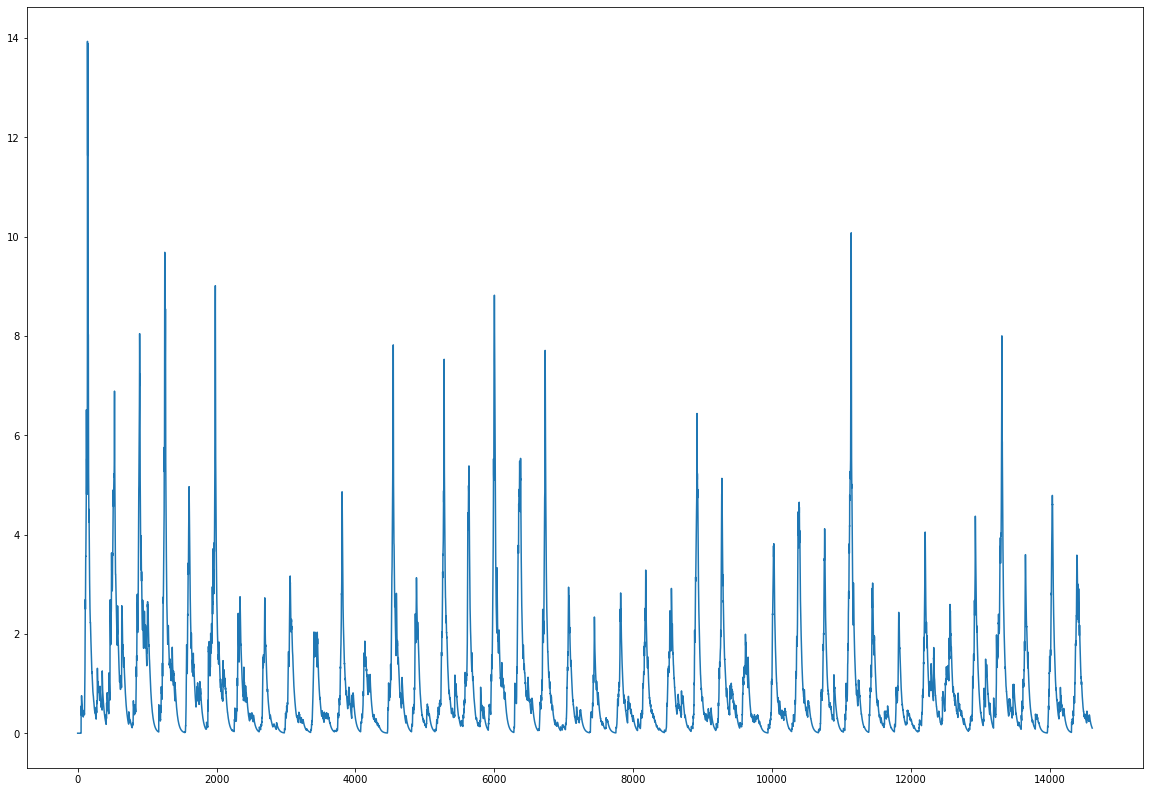

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize= (20,14))
plt.plot(data['Total Unrouted streamflow'])

In [11]:
# Set the parameters needed to retrieve data
siteNumber = "10109001" # LOGAN RIVER ABOVE STATE DAM, NEAR LOGAN, UT
parameterCode = "00060" # Discharge
startDate = "1981-01-02"
endDate = "2020-12-31"

# Retrieve the data
dailyStreamflow = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate) 
print("Retrieved " + str(len(dailyStreamflow[0])) + " data values.")

# Display the data frame as a table
dailyStreamflow[0]

Retrieved 14609 data values.


,00060_2_Mean,00060_2_Mean_cd,site_no,00060_Mean,00060_Mean_cd
datetime,,,,,
1981-01-02 00:00:00+00:00,113.0,A,10109001,113.0,A
1981-01-03 00:00:00+00:00,111.0,A,10109001,111.0,A
1981-01-04 00:00:00+00:00,111.0,A,10109001,111.0,A
1981-01-05 00:00:00+00:00,113.0,A,10109001,113.0,A
1981-01-06 00:00:00+00:00,109.0,A,10109001,109.0,A
...,...,...,...,...,...
2020-12-27 00:00:00+00:00,NaN,NaN,10109001,91.0,A
2020-12-28 00:00:00+00:00,NaN,NaN,10109001,85.9,A
2020-12-29 00:00:00+00:00,NaN,NaN,10109001,83.0,A


In [12]:
watershed_area = 554.257 * 10 ** 6
dailyStreamflow[0]['streamflow_mmDay']= dailyStreamflow[0]['00060_Mean'] * 24 * 3600 * 1000 /(watershed_area * 3.28084 ** 3)
dailyStreamflow[0]
# Q_sim['Q_obs'] = Q_obs


,00060_2_Mean,00060_2_Mean_cd,site_no,00060_Mean,00060_Mean_cd,streamflow_mmDay
datetime,,,,,,
1981-01-02 00:00:00+00:00,113.0,A,10109001,113.0,A,0.498799
1981-01-03 00:00:00+00:00,111.0,A,10109001,111.0,A,0.489971
1981-01-04 00:00:00+00:00,111.0,A,10109001,111.0,A,0.489971
1981-01-05 00:00:00+00:00,113.0,A,10109001,113.0,A,0.498799
1981-01-06 00:00:00+00:00,109.0,A,10109001,109.0,A,0.481143
...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,NaN,NaN,10109001,91.0,A,0.401688
2020-12-28 00:00:00+00:00,NaN,NaN,10109001,85.9,A,0.379176
2020-12-29 00:00:00+00:00,NaN,NaN,10109001,83.0,A,0.366375


Text(0, 0.5, 'Streamflow (cfs)')

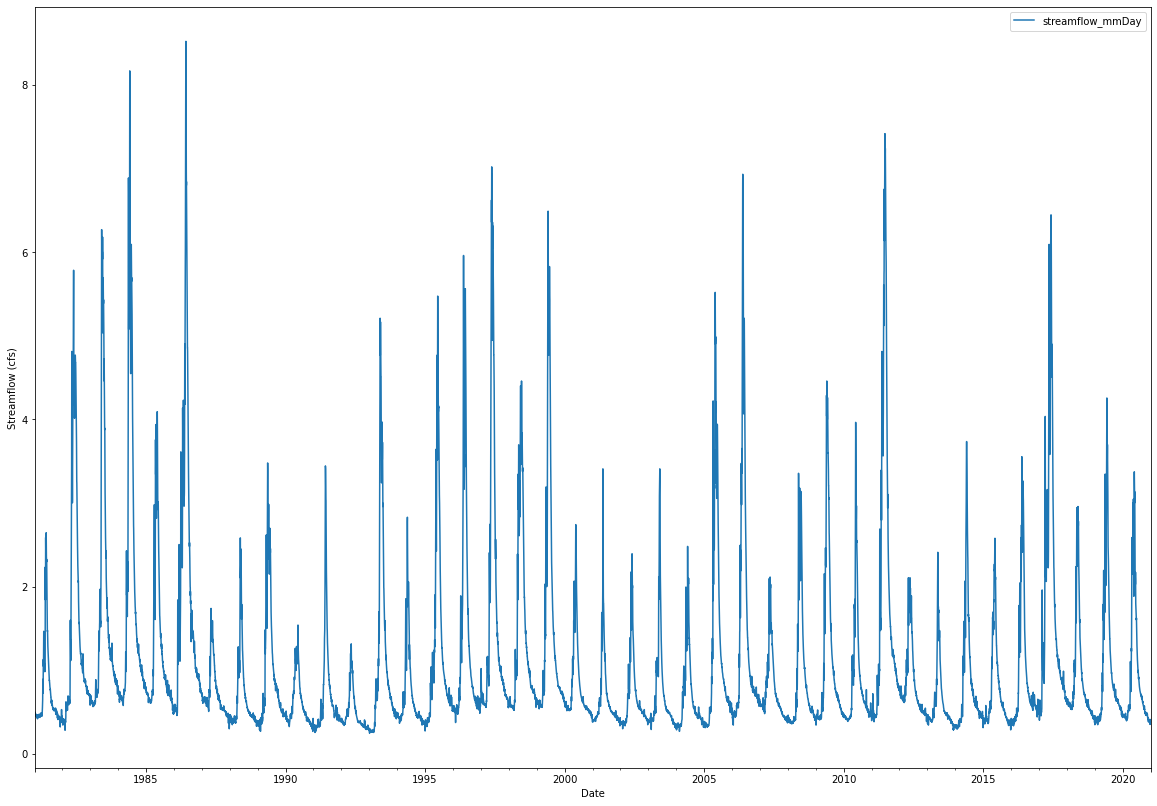

In [13]:
ax = dailyStreamflow[0].plot(y='streamflow_mmDay', figsize = (20,14))
ax.set_xlabel('Date')
ax.set_ylabel('Streamflow (cfs)')

In [14]:
streamflow['Q_obs'] = dailyStreamflow[0]['streamflow_mmDay'].values
streamflow

/tmp/ipykernel_1039/1670984280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  streamflow['Q_obs'] = dailyStreamflow[0]['streamflow_mmDay'].values


,date,Total Unrouted streamflow,Q_obs
0,1981-01-02,0.000000,0.498799
1,1981-01-03,0.000000,0.489971
2,1981-01-04,0.000000,0.489971
3,1981-01-05,0.000000,0.498799
4,1981-01-06,0.000000,0.481143
...,...,...,...
14604,2020-12-27,0.116748,0.401688
14605,2020-12-28,0.113137,0.379176
14606,2020-12-29,0.109638,0.366375
14607,2020-12-30,0.106247,0.363285


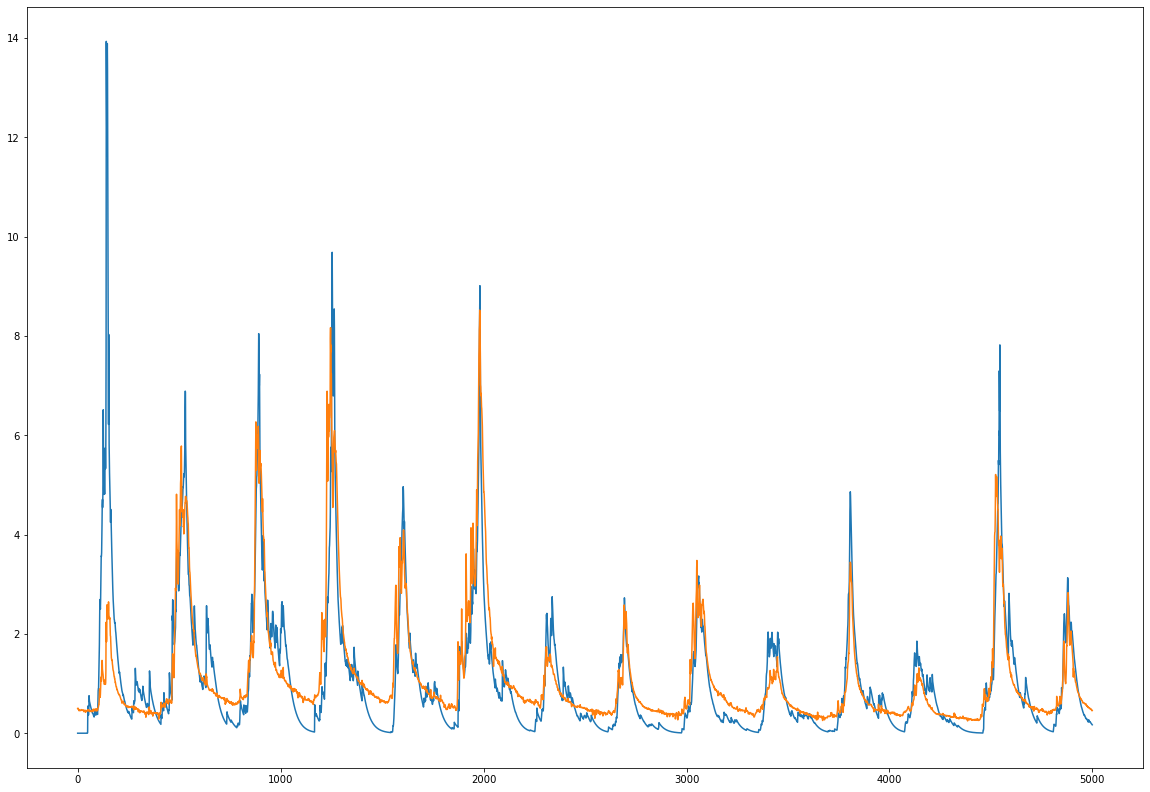

In [15]:
from matplotlib import pyplot as plt

plt.figure(figsize= (20,14))
plt.plot(streamflow['Total Unrouted streamflow'][0:5000])
plt.plot(streamflow['Q_obs'][0:5000])

In [16]:
up_sum = 0
down_sum = 0
for i in streamflow.index:
    sim = streamflow['Total Unrouted streamflow'][i]
    obs = streamflow['Q_obs'][i]

    up = (obs-sim)**2
    down = (obs-streamflow['Q_obs'].mean())**2
    up_sum += up
    down_sum += down


NSE = 1- (up_sum / down_sum)
NSE

0.6858297382896177

### The finalize function should perform all tasks that take place after exiting the model’s time loop. This typically includes deallocating memory, closing files and printing reports.

In [17]:
hbv_instance.finalize()